# 1) Objective

The thyroid gland is one of our body's most vital organs. Thyroid hormone releases are responsible for metabolic regulation.
Hyperthyroidism is one of the two common diseases of the thyroid that releases thyroid hormones in regulating the rate of body's metabolism.
<br><br> Objective - To address this problem a healthcare technology comapany wants to build a machine learning model to predict a patient's chance of obtaining Hyperthyroidism or not with Type 2 error close to zero. The model will assist the company in detecting Hyperthyroidism in a patient at an early stage.

# 2) Data description

The data set includes the following features:

* Age: The age of the patient. (Numerical)
* Sex: The gender of the patient. (Categorical: ‘F’ - Female or ‘M’ - Male)
* On thyroxine: This feature indicates whether the patient is currently taking thyroxine medication. (Categorical: ‘f’ - False or ‘t’ - True)
* Query on thyroxine: This feature indicates whether the patient has been asked about taking thyroxine medication. (Categorical: ‘f’ - False or ‘t’ - True)
* On antithyroid medication: This feature indicates whether the patient is currently taking antithyroid medication. (Categorical: ‘f’ - False or ‘t’ - True) 
* Sick: This feature indicates whether the patient is currently sick. (Categorical: ‘f’ - False or ‘t’ - True) 
* Pregnant: This feature indicates whether the patient is currently pregnant. (Categorical: ‘f’ - False or ‘t’ - True) 
* Thyroid surgery: This feature indicates whether the patient has had thyroid surgery. (Categorical: ‘f’ - False or ‘t’ - True)
* I131 treatment: This feature indicates whether the patient has received I131 treatment. (Categorical: ‘f’ - False or ‘t’ - True) 
* Lithium: This feature indicates whether the patient is currently taking lithium. (Categorical: ‘f’ - False or ‘t’ - True) 
* Goitre: This feature indicates whether the patient has a goitre. (Categorical: ‘f’ - False or ‘t’ - True)
* Tumor: This feature indicates whether the patient has a tumor. (Categorical: ‘f’ - False or ‘t’ - True) 
* Hypopituitary: This feature indicates whether the patient has hypopituitary. (Categorical: ‘f’ - False or ‘t’ - True)
* Psych: This feature indicates whether the patient has a psychiatric condition. (Categorical: ‘f’ - False or ‘t’ - True)  
* TSH measured: This feature indicates whether TSH was measured. (Categorical: ‘f’ - False or ‘t’ - True)
* TSH: This feature is the thyroid stimulating hormone level. (Numerical)
* T3 measured: This feature indicates whether T3 was measured. (Categorical: ‘f’ - False or ‘t’ - True)
* T3: This feature is the triiodothyronine level. (Numerical)
* TT4 measured: This feature indicates whether TT4 was measured. (Categorical: ‘f’ - False or ‘t’ - True) 
* TT4: This feature is the thyroxine level. (Numerical)
* T4U measured: This feature indicates whether T4U was measured. (Categorical: ‘f’ - False or ‘t’ - True)
* T4U: This feature is the free thyroxine level. (Numerical)
* FTI measured: This feature indicates whether FTI was measured. (Categorical: ‘f’ - False or ‘t’ - True)
* FTI: This feature is the free thyroxine index. (Numerical)
* TBG measured: This feature indicates whether TBG was measured. (Categorical: ‘f’ - False or ‘t’ - True) 
* TBG: This feature is the thyroxine binding globulin level. (Numerical) 
* Referral source: This feature indicates where the patient was referred from. (Categorical: WEST, STMW, SVHC, SVI, SVHD, Other) 
* Result: This features indicates wether the patient has Hyperthyroidism or not. (Numerical: 1-Positive or 0-Negative)

Data Source: Open Source

# 2) Importing necessary libraries

In [32]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 3) Importing Data

In [33]:
data=pd.read_csv("C:/Users/tanmo/Desktop/Classification Project/allhyper.csv")

# 4) Data Preprocessing and Understanding 

In [34]:
#Checking number of duplicate values
data.duplicated().sum()

146

In [35]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

In [36]:
#Rechecking  number of for duplicate values
data.duplicated().sum()

0

In [37]:
#Looking into data
data.head()

,Age,Sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Result
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,0
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,0
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,0
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,0
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,0


In [38]:
#Checking number of rows and columns in dataset.
data.shape

(3808, 28)

In [39]:
#Checking list of columns present in the dataset
data.columns

Index(['Age', 'Sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured',
       'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured',
       'TBG', 'referral source', 'Result'],
      dtype='object')

In [40]:
#Dropping irrelevant columns
data.drop(['query on thyroxine','TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured','referral source'],axis=1,inplace=True)

In [41]:
# Replacing "?" with  actual null
data= data.replace("?",np.nan)

In [42]:
#Checking Data type of columns
data.dtypes

Age                           object
Sex                           object
on thyroxine                  object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                           object
T3                            object
TT4                           object
T4U                           object
FTI                           object
TBG                          float64
Result                         int64
dtype: object

In [43]:
#Changing data tyoes of few columns to required data types
data['Age']=data['Age'].astype("float64")
data['TSH']=data['TSH'].astype("float64")
data['T3']=data['T3'].astype("float64")
data['TT4']=data['TT4'].astype("float64")
data['T4U']=data['T4U'].astype("float64")
data['FTI']=data['FTI'].astype("float64")

In [44]:
#Rechecking the changed data types
data.dtypes

Age                          float64
Sex                           object
on thyroxine                  object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
TBG                          float64
Result                         int64
dtype: object

# 5) EDA

### 5.1) Viewing overall description of data and checking errorneous data

In [45]:
#Basic Description of numerical columns
data.describe()

,Age,TSH,T3,TT4,T4U,FTI,TBG,Result
count,3807.000000,3488.00000,3085.000000,3646.000000,3485.000000,3487.000000,0.0,3808.000000
mean,51.751510,4.98951,2.093562,110.951399,0.991539,114.469372,NaN,0.054622
std,20.074015,24.23557,1.028788,39.763680,0.197245,44.751727,NaN,0.227270
min,1.000000,0.00500,0.050000,2.000000,0.250000,2.000000,NaN,0.000000
25%,36.000000,0.40000,1.600000,88.000000,0.870000,93.000000,NaN,0.000000
50%,54.000000,1.30000,2.000000,104.500000,0.970000,108.000000,NaN,0.000000
75%,67.000000,2.60000,2.400000,127.000000,1.080000,126.000000,NaN,0.000000
max,455.000000,530.00000,18.000000,430.000000,2.320000,839.000000,NaN,1.000000


In [46]:
#Dropping column with all the values as null
data.drop(['TBG'],axis=1,inplace=True)
#Removing record having 455 as Age.
data.drop(data[data['Age']==455].index, inplace=True)

In [47]:
# Rechecking basic description of numerical columns
data.describe()

,Age,TSH,T3,TT4,T4U,FTI,Result
count,3806.00000,3487.000000,3084.000000,3645.000000,3484.000000,3486.000000,3807.000000
mean,51.64556,4.990625,2.093593,110.949465,0.991499,114.472375,0.054636
std,18.98223,24.238956,1.028954,39.768965,0.197260,44.757796,0.227299
min,1.00000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000
25%,36.00000,0.400000,1.600000,88.000000,0.870000,93.000000,0.000000
50%,54.00000,1.300000,2.000000,104.000000,0.970000,108.000000,0.000000
75%,67.00000,2.600000,2.400000,127.000000,1.080000,126.000000,0.000000
max,94.00000,530.000000,18.000000,430.000000,2.320000,839.000000,1.000000


In [48]:
#Basic Description of categorical columns
data.describe(include='object')

,Sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych
count,3648,3807,3807,3807,3807,3807,3807,3807,3807,3807,3807,3807
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,F,f,f,f,f,f,f,f,f,f,f,f
freq,2484,3342,3761,3661,3753,3754,3745,3789,3773,3705,3806,3623


In [49]:
#Checking the datapoints of categorical varaibles
Categorical_column=data.select_dtypes(include='object').T.index
for i in Categorical_column:
    print(i)
    print(data[i].value_counts())

Sex
F    2484
M    1164
Name: Sex, dtype: int64
on thyroxine
f    3342
t     465
Name: on thyroxine, dtype: int64
on antithyroid medication
f    3761
t      46
Name: on antithyroid medication, dtype: int64
sick
f    3661
t     146
Name: sick, dtype: int64
pregnant
f    3753
t      54
Name: pregnant, dtype: int64
thyroid surgery
f    3754
t      53
Name: thyroid surgery, dtype: int64
I131 treatment
f    3745
t      62
Name: I131 treatment, dtype: int64
lithium
f    3789
t      18
Name: lithium, dtype: int64
goitre
f    3773
t      34
Name: goitre, dtype: int64
tumor
f    3705
t     102
Name: tumor, dtype: int64
hypopituitary
f    3806
t       1
Name: hypopituitary, dtype: int64
psych
f    3623
t     184
Name: psych, dtype: int64


### 5.2) Checking and handling missing values

In [50]:
#Checking null values
data.isnull().sum()

Age                            1
Sex                          159
on thyroxine                   0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          320
T3                           723
TT4                          162
T4U                          323
FTI                          321
Result                         0
dtype: int64

Since hormone levels vary widely from male to female and in different age groups it is wise to drop records with missing sex and missing age values, imputing its missing values might lead to wrong prediction.

In [51]:
# Dropping records with null sex and null age values
data=data.dropna(subset=['Sex','Age']).reset_index()
data.drop('index',axis=1,inplace=True)

Since, the missing values in variables -  'FTI', 'TSH', 'T3', 'TT4' and 'T4U' are because these tests were not done for the respective patients. Therefore we will replace the missing values of these columns with 0 (meaning no result).

In [52]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    data[i] = data[i].fillna(0)

In [53]:
data.isnull().sum()

Age                          0
Sex                          0
on thyroxine                 0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Result                       0
dtype: int64

In [54]:
#Checking shape of data after treating null values
data.shape

(3647, 19)

### 5.3) Univariate Analysis

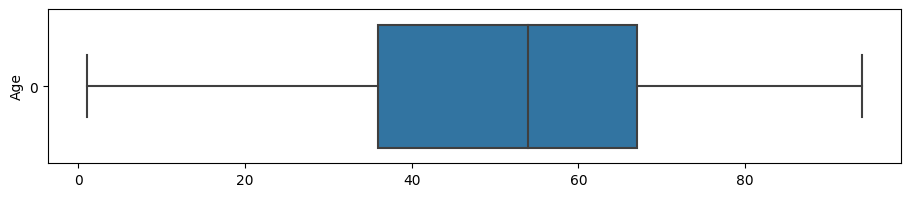

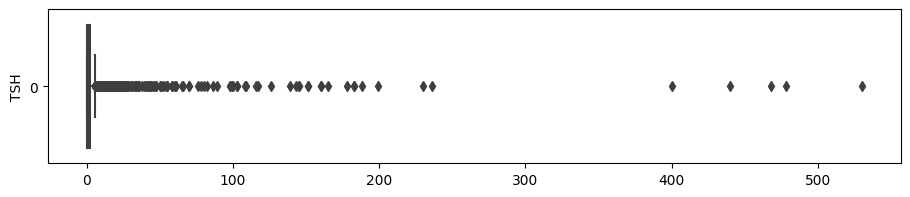

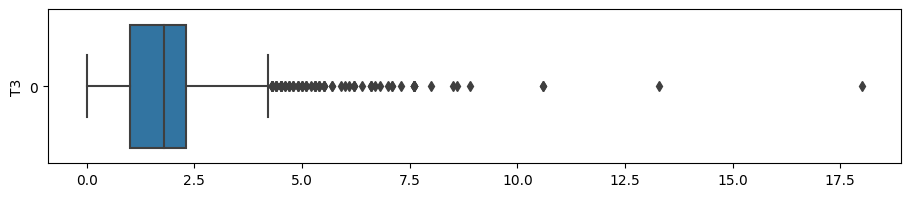

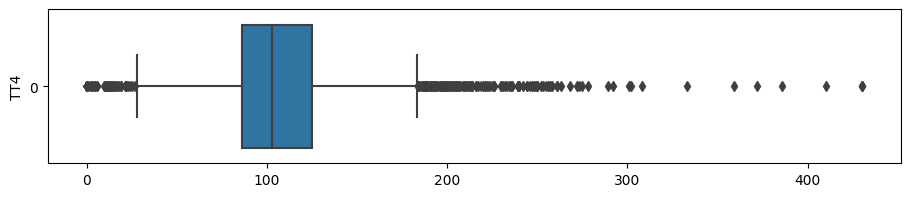

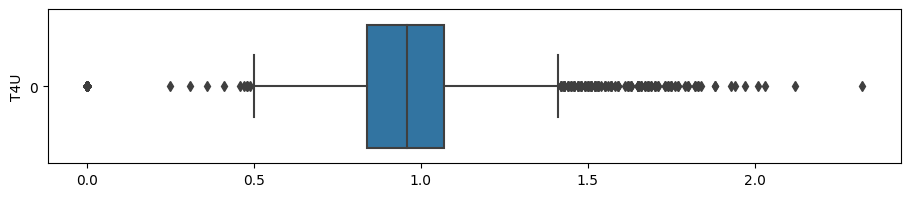

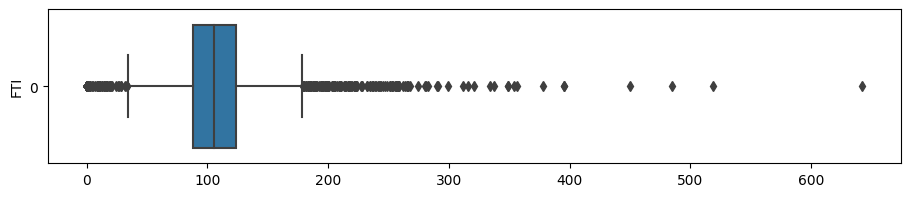

In [55]:
# Plotting box-plot of Numerical columns to understand distribution of data
num_col=list(data.select_dtypes(include='float64').T.index)
for i in num_col:
    fig, ax = plt.subplots(figsize=(11,2))
    sns.boxplot(data=data[i], orient='h',ax=ax)
    plt.ylabel(i)
    plt.show()


As the outliers present in T4U, TT4, T3, TSH and FTI are medically significant, no outlier treatment is required for these variables.

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'TSH'}>],
       [<AxesSubplot: title={'center': 'T3'}>,
        <AxesSubplot: title={'center': 'TT4'}>],
       [<AxesSubplot: title={'center': 'T4U'}>,
        <AxesSubplot: title={'center': 'FTI'}>]], dtype=object)

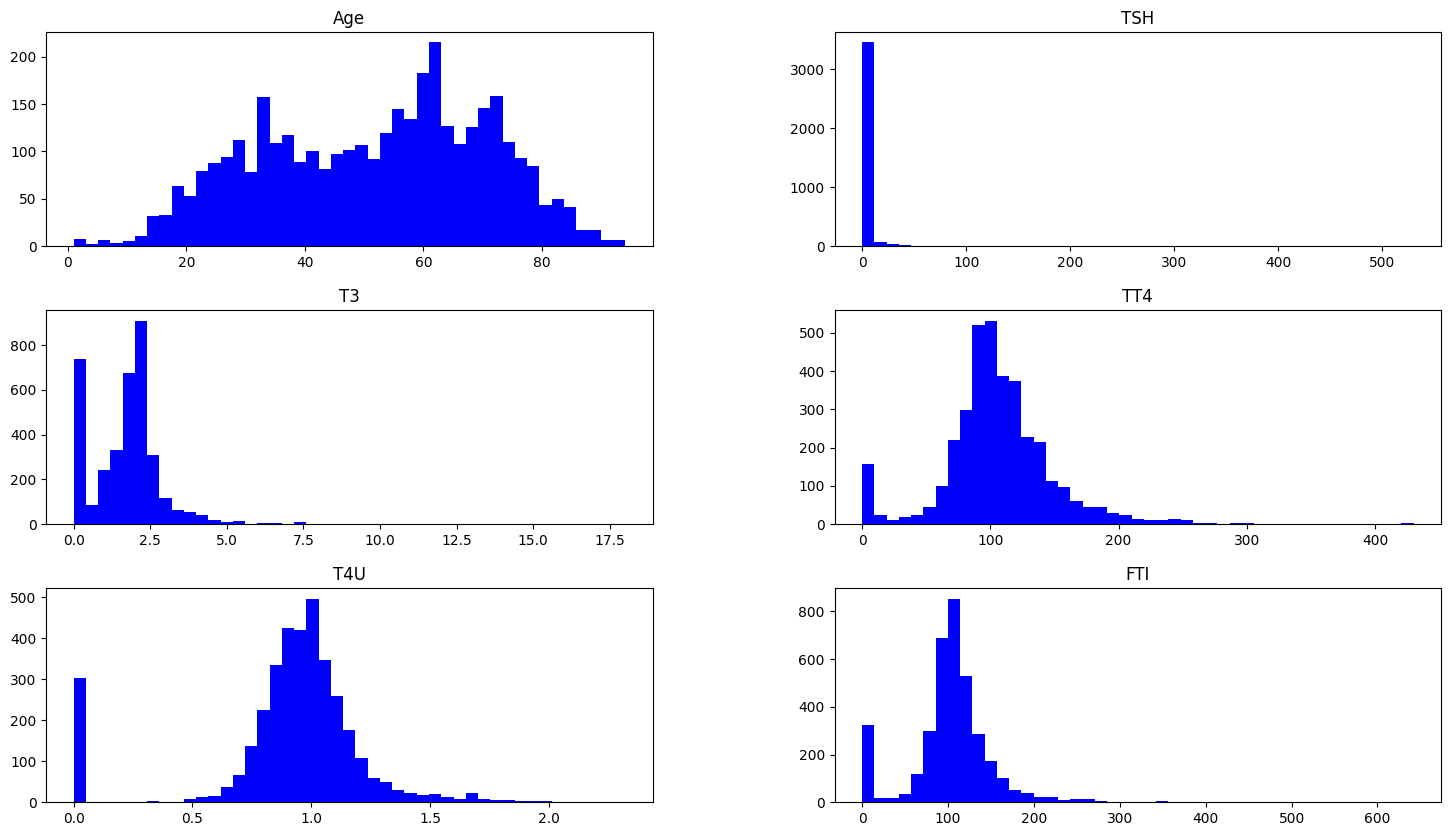

In [56]:
#Plotting Histogram of Numerical columns
num_col=list(data.select_dtypes(include='float64').T.index)
data.hist(num_col,figsize=(18,10),color='blue',grid=False, bins=45)

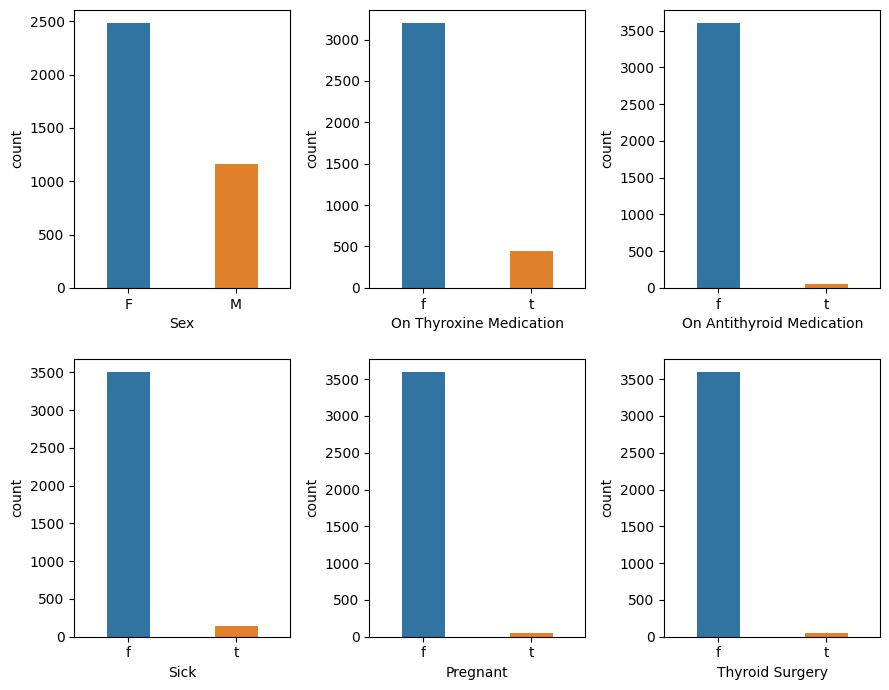

In [57]:
label= ['Sex', 'On Thyroxine Medication', 'On Antithyroid Medication', 'Sick', 'Pregnant',
       'Thyroid Surgery', 'I131 Teatment', 'Lithium', 'Goitre', 'Tumor',
       'Hypopituitary', 'Psych']
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 7))

# Plot the bar graphs
i=0
for j in range(0,2):
    for k in range(0,3):
        figg=sns.countplot(data=data, x=Categorical_column[i],ax=axes[j,k],width=0.4,alpha=1)
        axes[j, k].set_xlabel(label[i])
        i=i+1

plt.tight_layout(h_pad=2)

# Display the plot
plt.show()

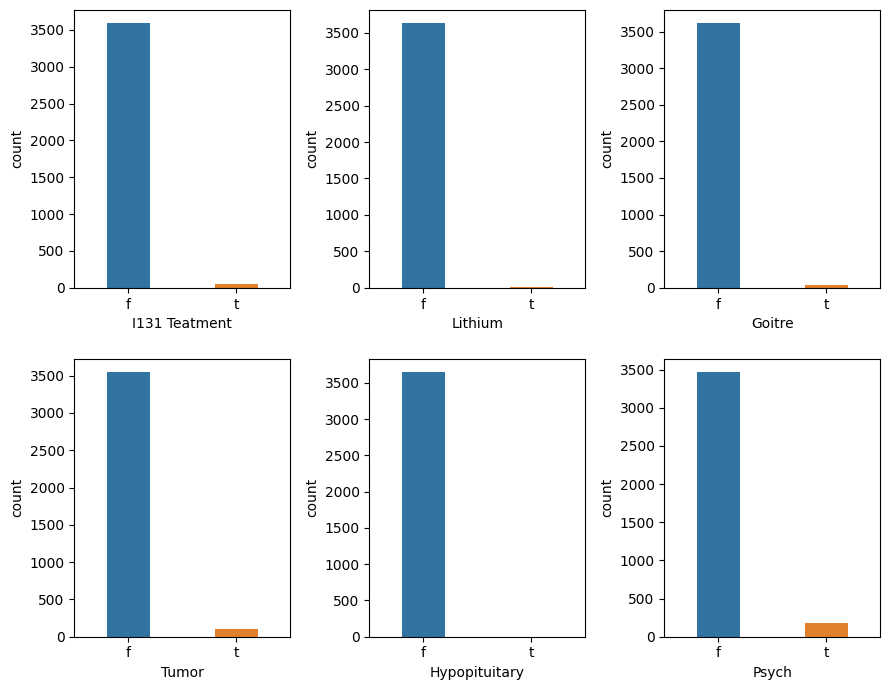

In [58]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 7))
# Plot the bar graphs
i=6
for j in range(0,2):
    for k in range(0,3):
        figg=sns.countplot(data=data, x=Categorical_column[i],ax=axes[j,k],width=0.4,alpha=1)
        axes[j, k].set_xlabel(label[i])
        i=i+1
plt.tight_layout(h_pad=2)
plt.show()

Text(0.5, 0, 'Result (0: Negative, 1: Positive)')

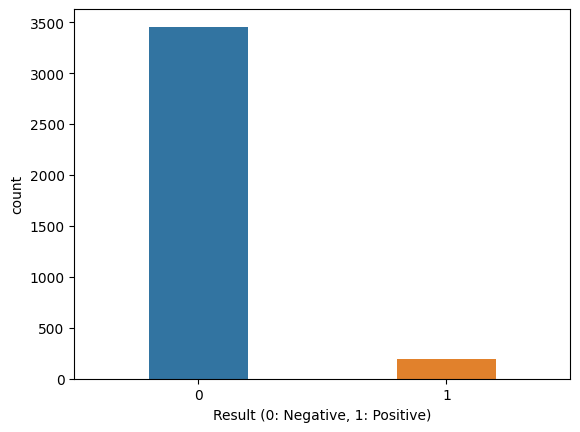

In [59]:
figg=sns.countplot(data=data, x='Result',width=0.4,alpha=1)
plt.xlabel("Result (0: Negative, 1: Positive)")

As from the graph, we could see the from the above "Result" countplot, dataset is highly imbalanced.

<AxesSubplot: xlabel='Age', ylabel='Count'>

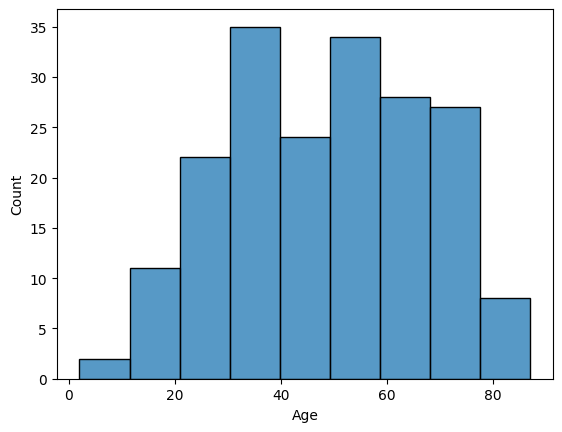

In [60]:
#Checking which age group is suffering the most with Hyper Thyroidism
data1=data[data['Result']==1]
sns.histplot(x='Age',data=data1)

The above plot shows Hyper Thyroidism cases are generally high at older age groups 

<AxesSubplot: xlabel='Sex', ylabel='count'>

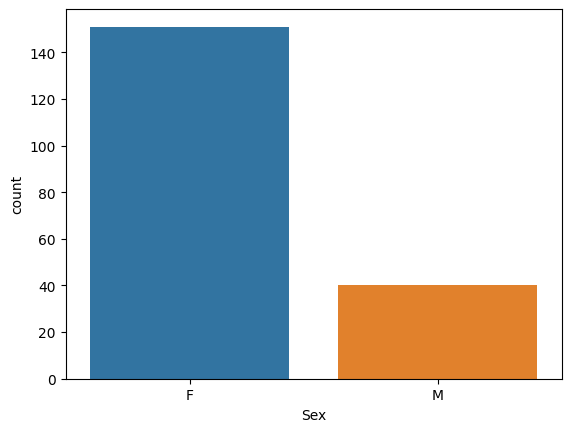

In [61]:
#Checking which gender is suffering the most with Hyper Thyroidism
data1=data[data['Result']==1]
sns.countplot(x='Sex',data=data1)

The above plot shows Hyper Thyroidism cases are generally high in Females. 

### 5.4) Bivariate Analysis

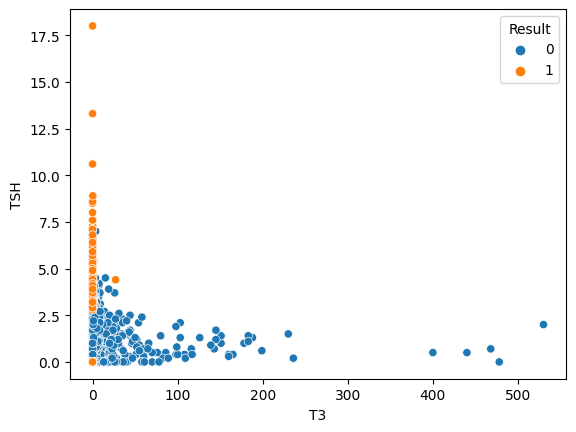

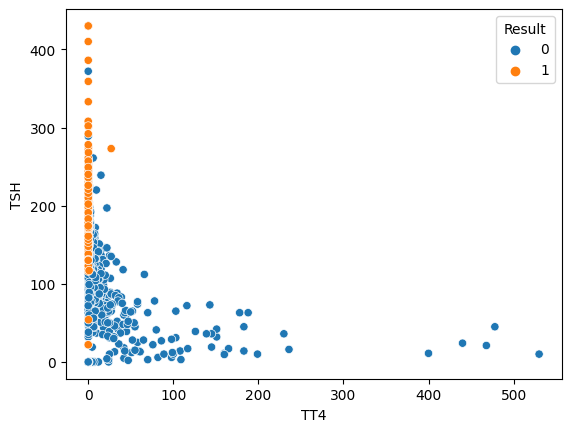

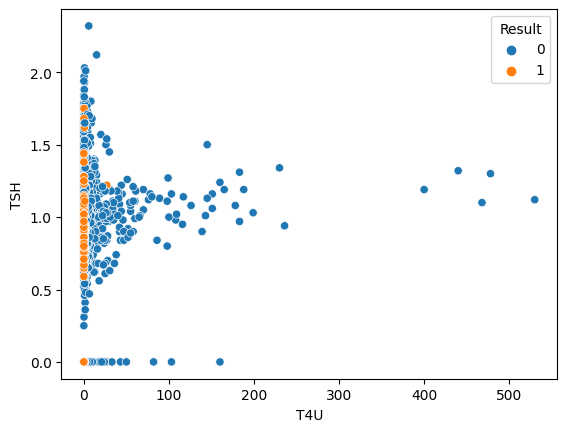

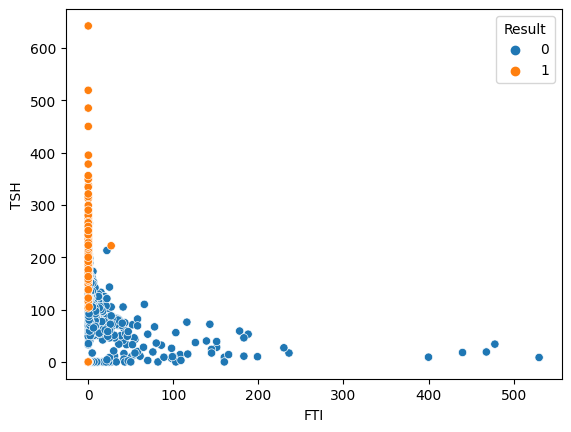

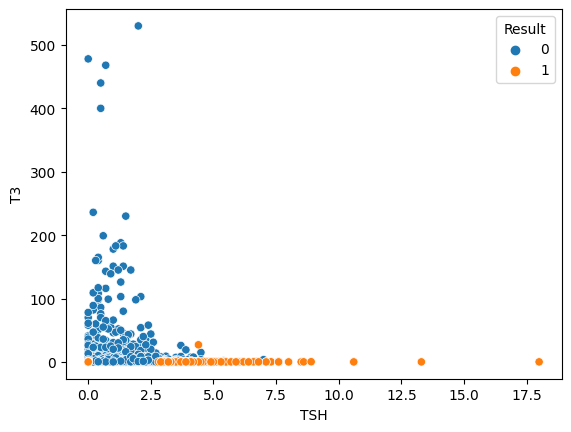

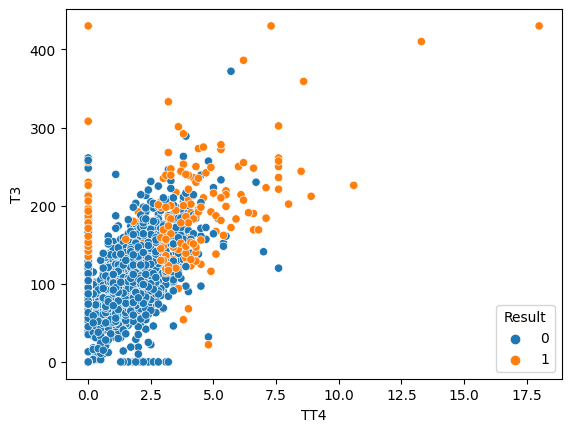

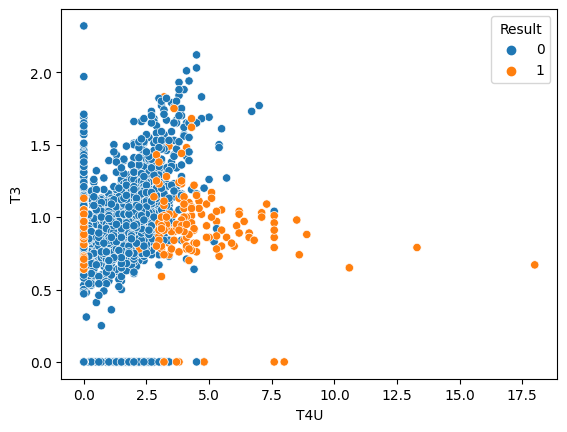

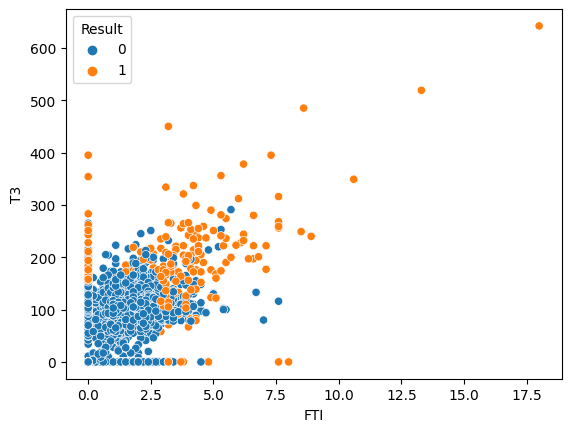

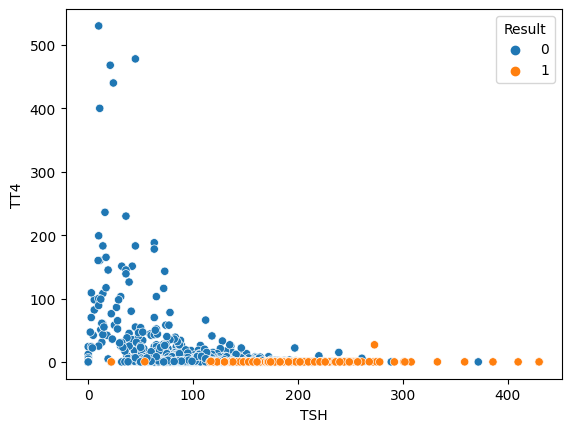

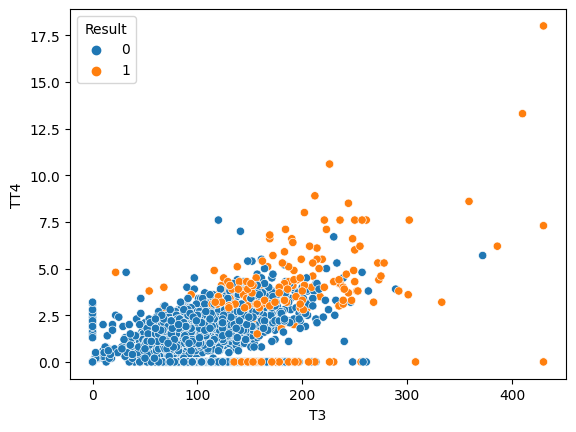

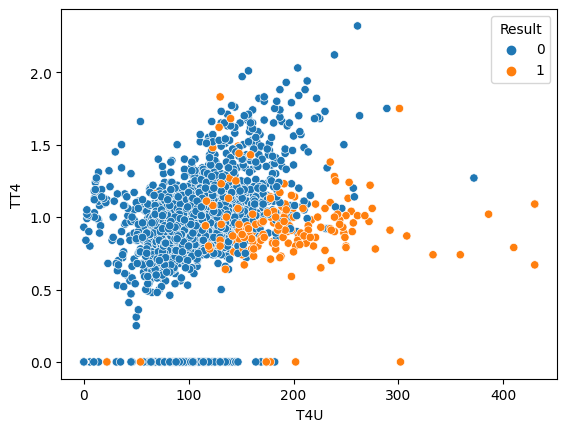

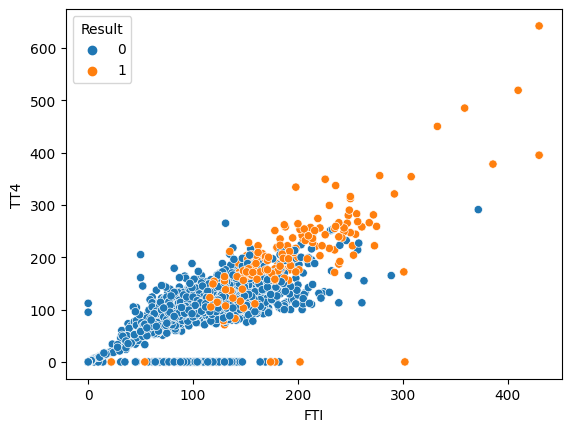

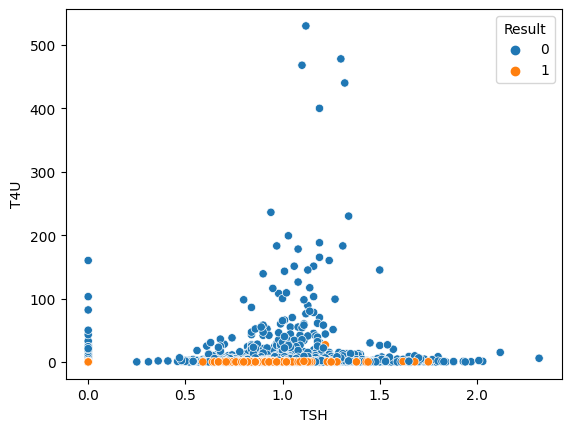

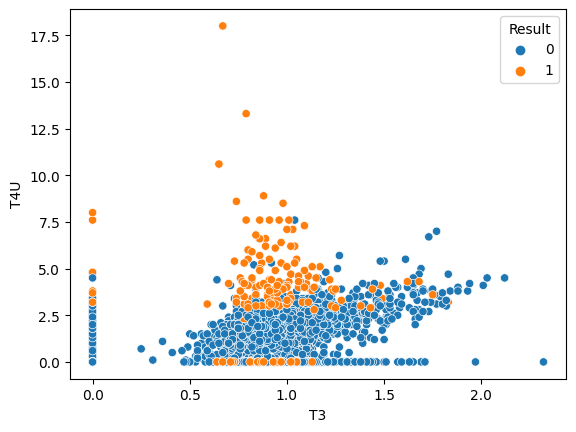

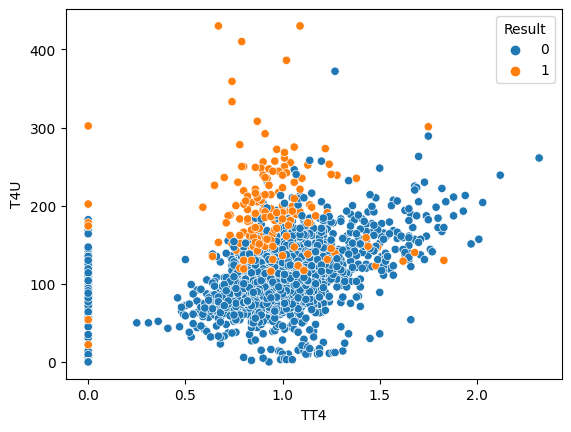

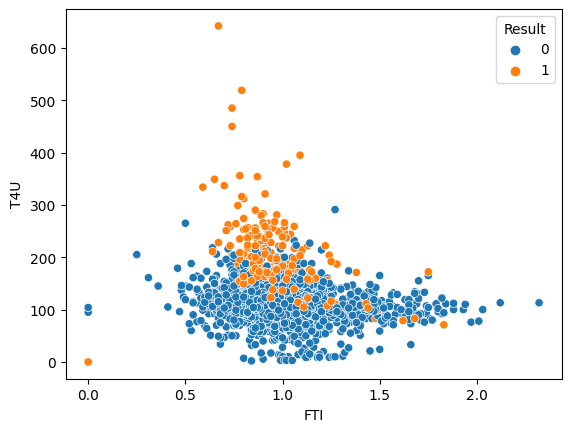

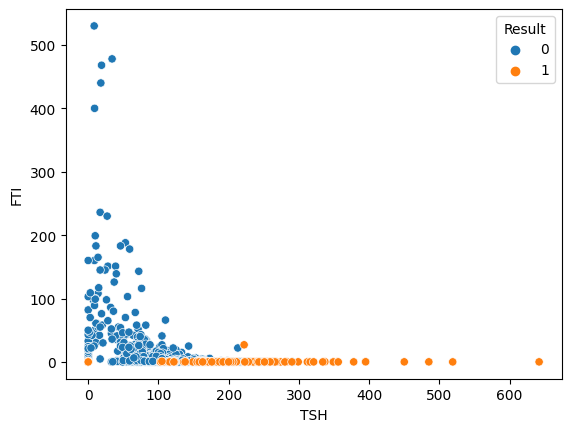

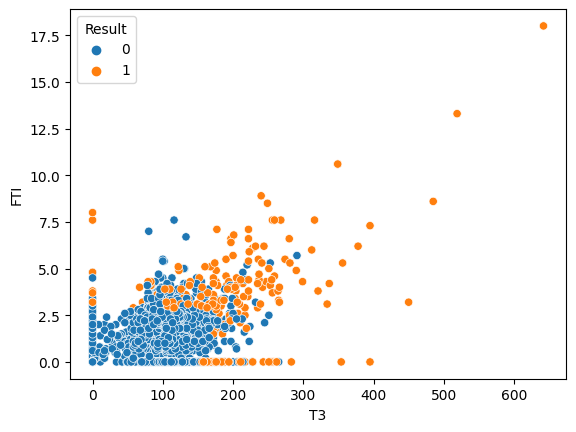

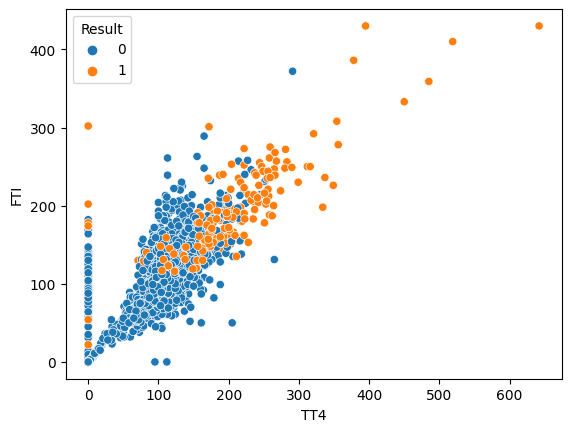

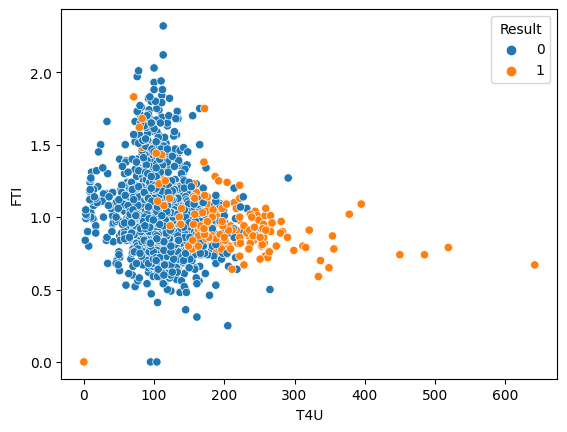

In [62]:
#Plotting scatter plots
import plotly.express as px
num_cols=['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if(i!=j):
            fig = sns.scatterplot(x=data[num_cols[i]], y=data[num_cols[j]],hue=data['Result'])
            plt.ylabel(num_cols[i])
            plt.xlabel(num_cols[j])
            plt.show()

From most of the above scatter plots we could infer that most of test results having values on higher side are mostly suffering from Hyperthyroidism.

### 5.5) Checking correlation between variables

<AxesSubplot: >

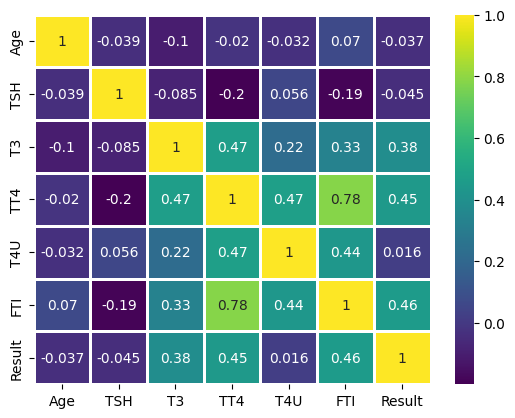

In [63]:
#Checking correlation between numerical variables
Correlation=data.corr()
sns.heatmap(Correlation,cmap='viridis',annot=True,linewidth=2)

### 5.6) Handling categorical variable

In [64]:
#Treating Categorical variables
data=pd.get_dummies(data,drop_first=True)
data

,Age,TSH,T3,TT4,T4U,FTI,Result,Sex_M,on thyroxine_t,on antithyroid medication_t,sick_t,pregnant_t,thyroid surgery_t,I131 treatment_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t
0,41.0,1.300,2.5,125.0,1.14,109.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23.0,4.100,2.0,102.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46.0,0.980,0.0,109.0,0.91,120.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,70.0,0.160,1.9,175.0,0.00,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,70.0,0.720,1.2,61.0,0.87,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,29.0,0.020,5.7,172.0,0.86,200.0,1,1,0,0,0,0,0,0,0,0,0,0,0
3643,28.0,0.020,5.9,183.0,0.82,223.0,1,1,0,0,0,0,0,0,0,0,0,0,0
3644,43.0,0.020,2.9,130.0,0.80,163.0,1,1,0,0,0,0,0,0,0,0,0,0,0
3645,61.0,0.025,8.0,202.0,0.00,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0


# 6) Model Building

### 6.1) Building base model

In [69]:
#Dividing dataset into feature set and target variable.
X=data.drop('Result',axis=1)
y=data['Result']

In [70]:
#Handling imbalance dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [71]:
#Checking value counts of each class in Target variable.
y_smote.value_counts()

0    3525
1    3525
Name: Result, dtype: int64

In [72]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [73]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=list(X_train.columns))
X_test = pd.DataFrame(scaler.transform(X_test),columns=list(X_test.columns))

In [77]:
#Training and testing models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

models = {
    KNeighborsClassifier():'KNN',
    LogisticRegression(max_iter=700):'Logistic Regression',
    DecisionTreeClassifier():'Decision Tree',
    RandomForestClassifier(oob_score=True,n_jobs=-1):'Random Forest'  
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    #Predicting on training data
    y_pred_train=model.predict(X_train)
    # Predicting on test data
    y_pred_test=model.predict(X_test)
    #Checking Type 2 error, F1 score and accuracy
    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    type_2_error_rate = fn/(fn+tp)
    print(f"Train Accuracy Score using {name} is : ",round(accuracy_score(y_train,y_pred_train)*100,2))
    print(f"Test Type 2 error rate using {name} is :", round(type_2_error_rate,2))
    print(f"Test F1 Score using {name} is : ",round(f1_score(y_test, y_pred_test),2))
    print(f"Test Accuracy Score using {name} is : ",round(accuracy_score(y_test, y_pred_test)*100,2),"%\n")

Train Accuracy Score using KNN is :  98.35
Test Type 2 error rate using KNN is : 0.01
Test F1 Score using KNN is :  0.97
Test Accuracy Score using KNN is :  97.3 %

Train Accuracy Score using Logistic Regression is :  93.94
Test Type 2 error rate using Logistic Regression is : 0.05
Test F1 Score using Logistic Regression is :  0.94
Test Accuracy Score using Logistic Regression is :  94.26 %

Train Accuracy Score using Decision Tree is :  100.0
Test Type 2 error rate using Decision Tree is : 0.01
Test F1 Score using Decision Tree is :  0.98
Test Accuracy Score using Decision Tree is :  98.44 %

Train Accuracy Score using Random Forest is :  100.0
Test Type 2 error rate using Random Forest is : 0.0
Test F1 Score using Random Forest is :  0.99
Test Accuracy Score using Random Forest is :  99.15 %



<b>Conclusion:</b> From the above results of model performance, we can conclude that the base model of Random Forest Classifier was able to solve the objective of problem and given the context of the problem it was imperative to achieve high accuracy and F1 score with zero type 2 error. Therefore we will use the Random Forest Classifier to predict Hyper Thyroidism.

### 6.2) Plotting Confusion matrix , AUC - ROC curve and finding important features using Random Forest model

Text(0.5, 1.0, 'Confusion Matrix')

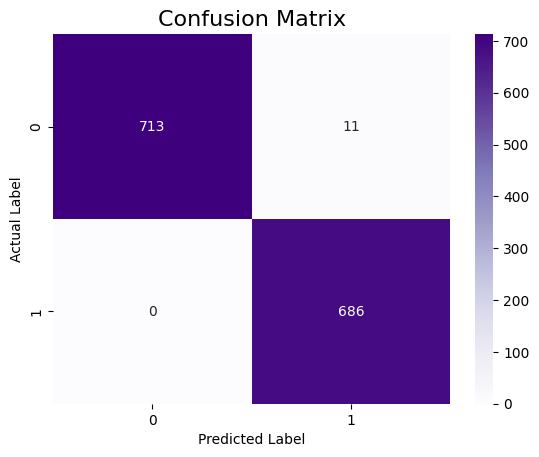

In [79]:
#Plotting Confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

models =  RandomForestClassifier()
#Fitting model
model.fit(X_train,y_train)
#Predicting on test data
y_pred=model.predict(X_test)
#Printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='Purples',fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix',fontsize=16)

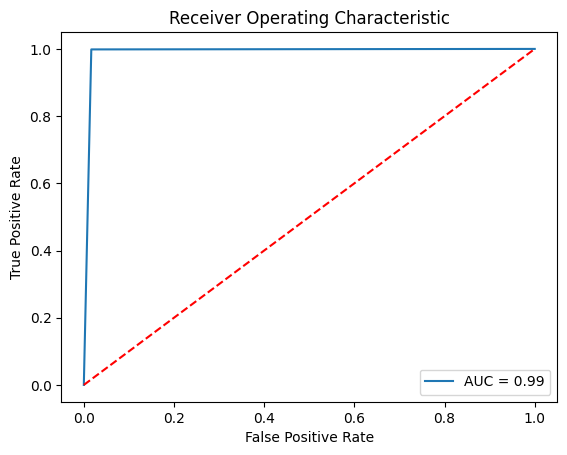


Top 10 features contributing to detection of Hyper Thyroidism:

Feature 'FTI': 0.25
Feature 'T3': 0.224
Feature 'TT4': 0.222
Feature 'TSH': 0.187
Feature 'on thyroxine_t': 0.035
Feature 'T4U': 0.029
Feature 'Sex_M': 0.018
Feature 'Age': 0.018
Feature 'tumor_t': 0.008
Feature 'psych_t': 0.003


In [76]:
#Plotting AUC-ROC curve and finding important features.
# Calculating the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
# Computing the false positive rate, true positive rate, and classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plotting the AUC-ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_roc)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
#Checking 10 important features affecting Hyperthyroidism
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nTop 10 features contributing to detection of Hyper Thyroidism:\n")
for i in range(X_train.shape[1]-8):
    print(f"Feature '{X_train.columns[indices[i]]}': {round(importances[indices[i]],3)}")